In [132]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics
import os
os.chdir (r"D:\anaconda\ashok\Project\SupervisedLearning")

In [7]:
# Performing Basic EDA in below steps:

# Reading the data as a data frame
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]
print (df)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  SecuritiesAccount  CDAccount  Online  \
0            0              0           

In [6]:
# Information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Finding Shape of data
# Inference : There are 5000 rows and 14 columns of data
df.shape

(5000, 14)

In [9]:
# Finding Type
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
Personal_Loan          int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [10]:
# Checking presence of missing values
# Inference : There are no missing values
df.isnull()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Checking presence of missing values
# Inference : No null values in the dataset
df.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [12]:
# Viewing first 10 rows of data
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [13]:
# Five point summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [14]:
# Finding unique data
df.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [15]:
#Finding Mean
df.mean()

ID                    2500.500000
Age                     45.338400
Experience              20.104600
Income                  73.774200
ZIPCode              93152.503000
Family                   2.396400
CCAvg                    1.937938
Education                1.881000
Mortgage                56.498800
Personal_Loan            0.096000
SecuritiesAccount        0.104400
CDAccount                0.060400
Online                   0.596800
CreditCard               0.294000
dtype: float64

In [16]:
#Finding Median
df.median()

ID                    2500.5
Age                     45.0
Experience              20.0
Income                  64.0
ZIPCode              93437.0
Family                   2.0
CCAvg                    1.5
Education                2.0
Mortgage                 0.0
Personal_Loan            0.0
SecuritiesAccount        0.0
CDAccount                0.0
Online                   1.0
CreditCard               0.0
dtype: float64

In [17]:
#Finding Standard Deviation
df.std()

ID                   1443.520003
Age                    11.463166
Experience             11.467954
Income                 46.033729
ZIPCode              2121.852197
Family                  1.147663
CCAvg                   1.747659
Education               0.839869
Mortgage              101.713802
Personal_Loan           0.294621
SecuritiesAccount       0.305809
CDAccount               0.238250
Online                  0.490589
CreditCard              0.455637
dtype: float64

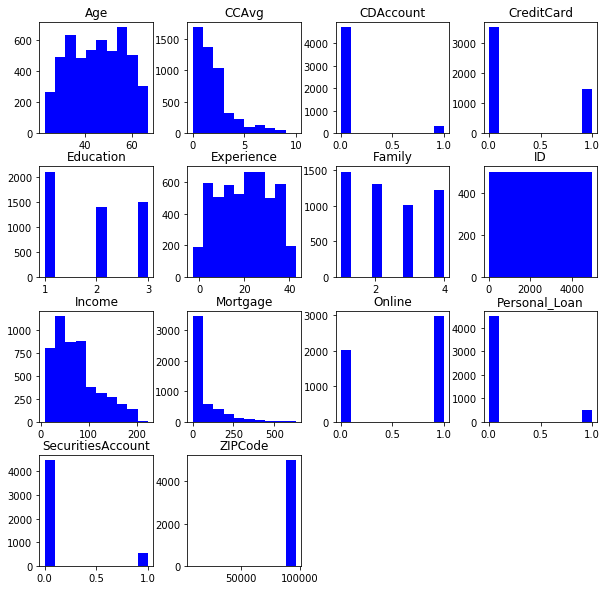

In [20]:
#Ploting histogram to check that if data columns are normal or almost normal or not
df.hist(figsize=(10,10),color="blue",grid=False)
plt.show()

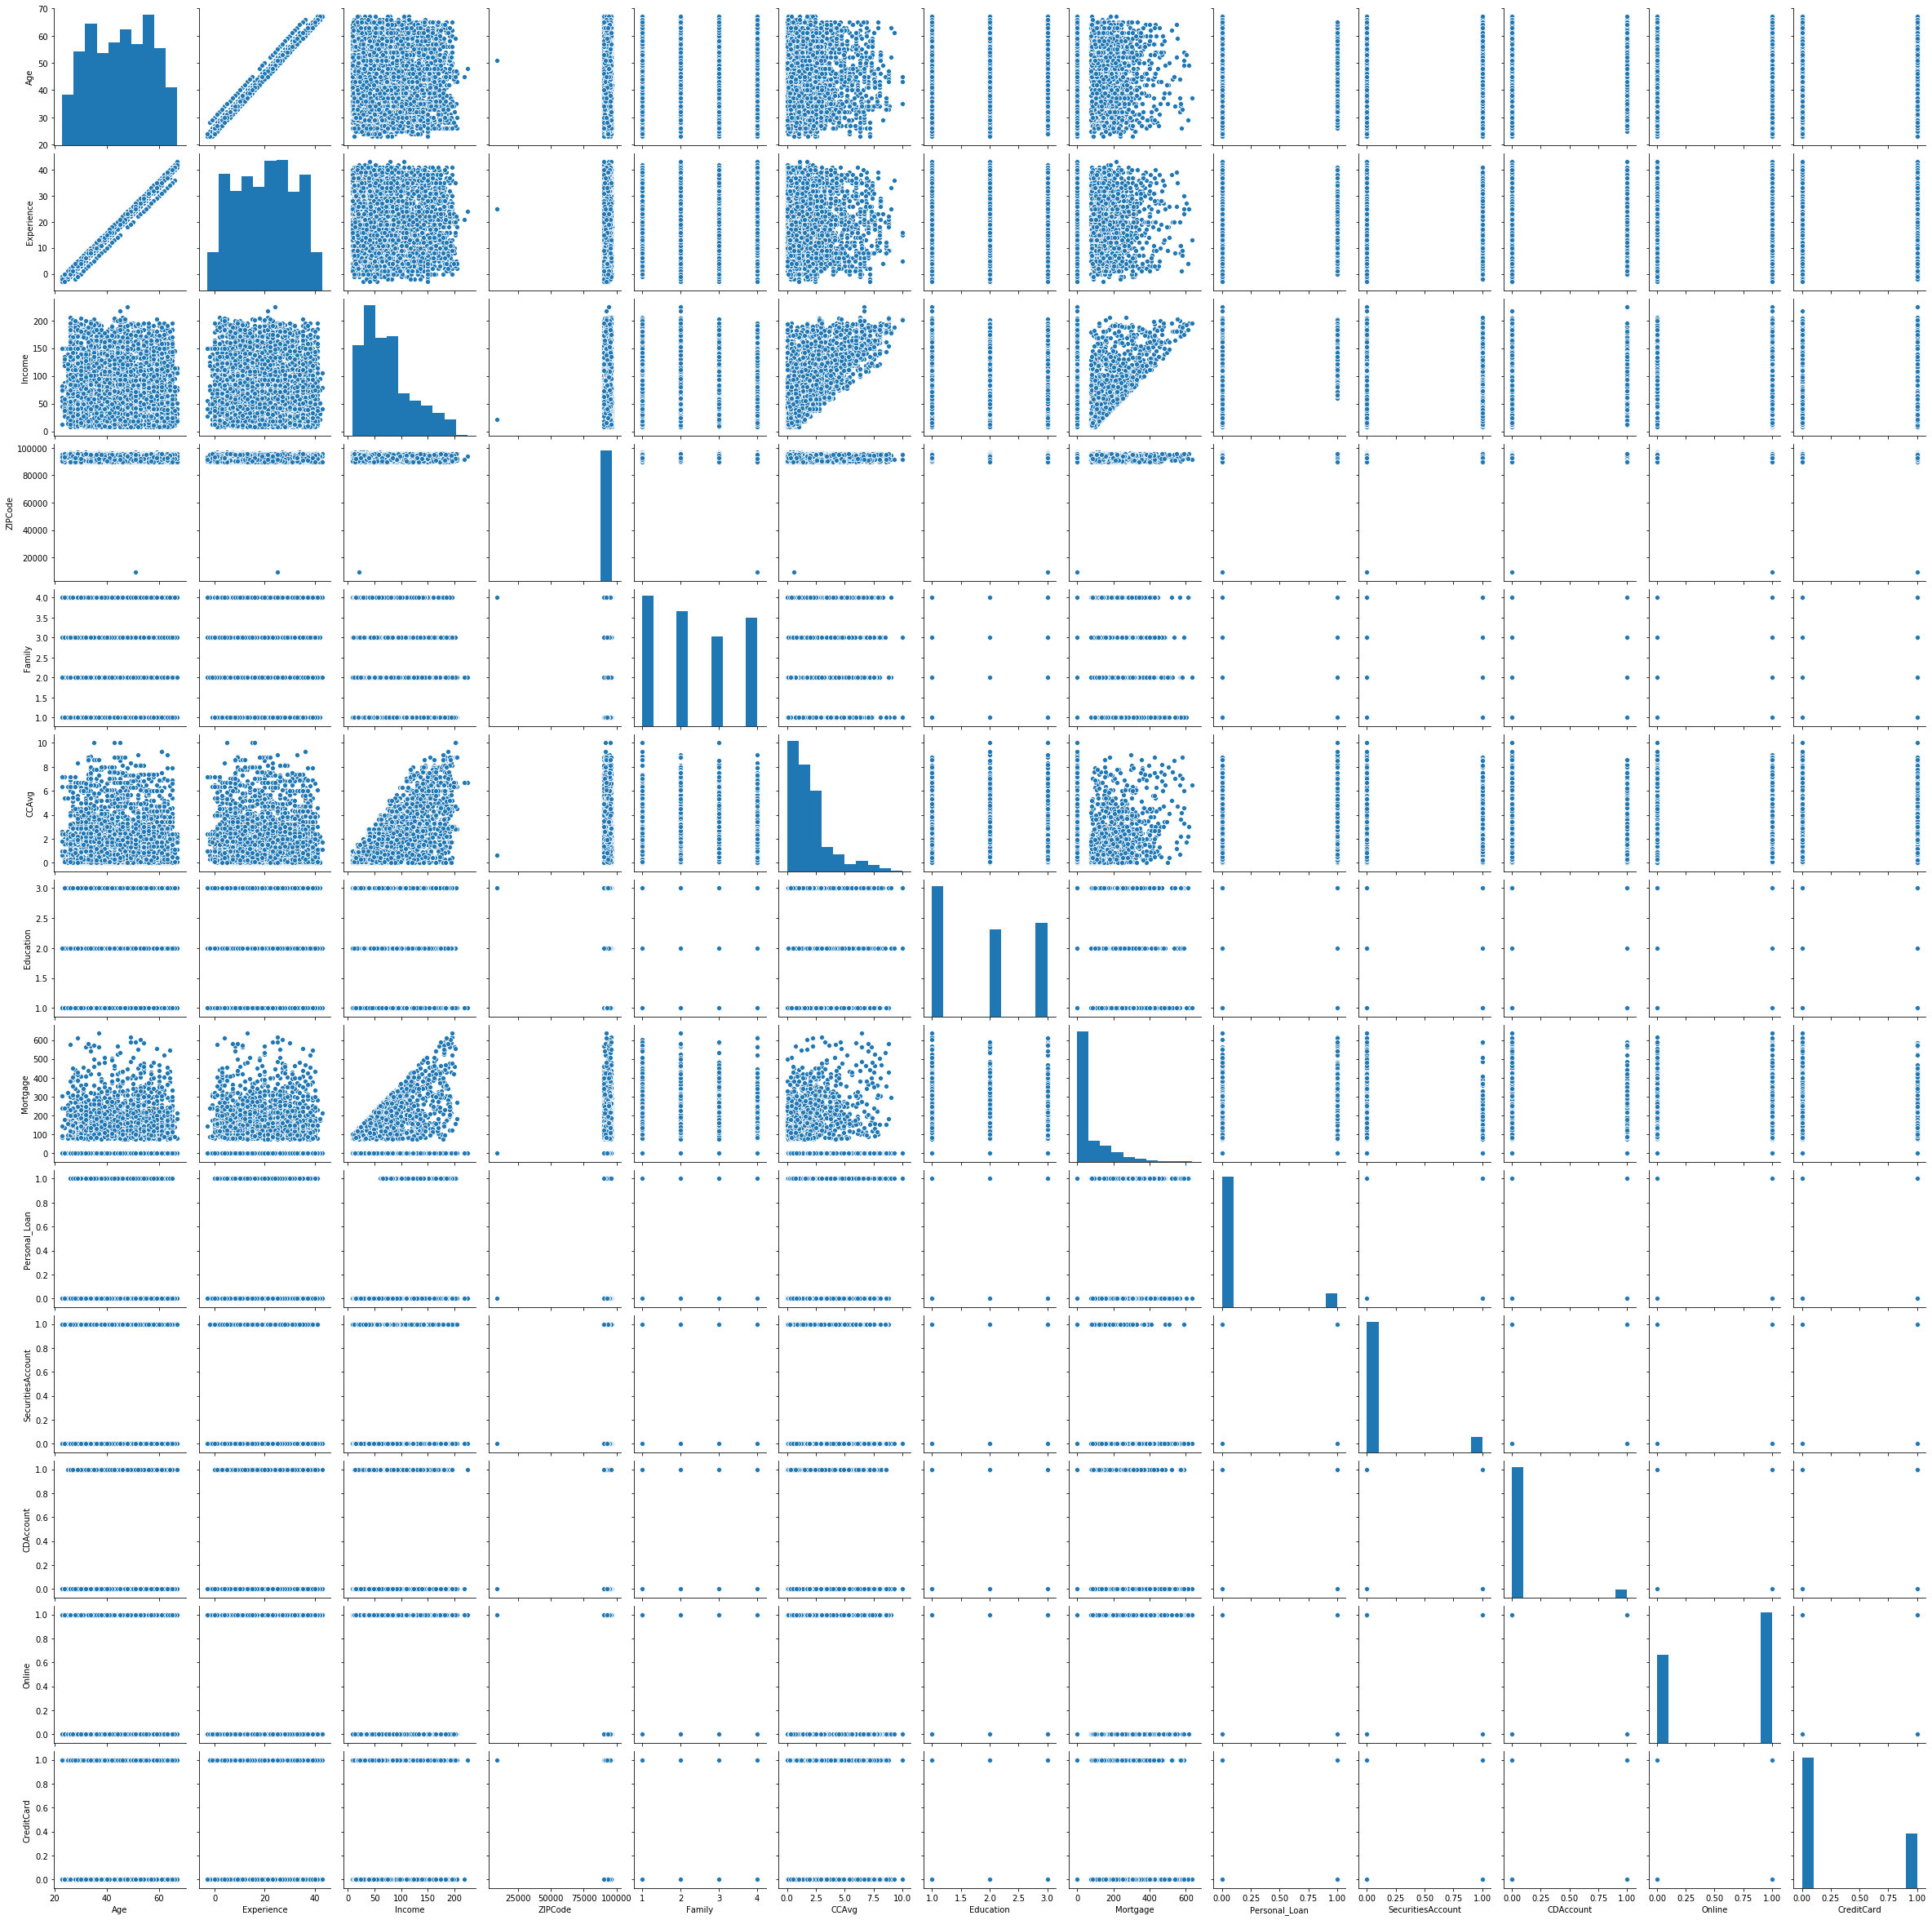

In [23]:
# Pair Plot
sns.pairplot(df.iloc[:,1:])

In [25]:
# Findings - Data distribution in each of the attributes:

# Summary of Given Data: 
"""
1.The variable ID does not add any significance for our analysis

2.There are 2 nominal variables: 
a.ID
b.Zip Code

3.There are 2 Ordinal Categorical Variables:
a.Family - Family size of the customer 
b.Education - Education level of the customer

4.There are 5 independent variables:
a.Age: Age of the customer
b.Experience: Years of experience of the customer
c.Income: Annual income in dollars
d.CCAvg: Average credit card spending
e.Mortage: Value of House Mortgage

5.There are 5 binary category variables:
a.Personal Loan: Did this customer accept the personal loan offered in the last campaign?
b.Securities Account: Does the customer have a securities account with the bank?
c.CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
d.Online: Does the customer use internet banking facilities?
e.Credit Card: Does the customer use a credit card issued by UniversalBank?

6.Target variable is :Personal Loan
""" 

#Findings - Data distribution in each of independent attributes (excluding 2 nominal & 5 binary category variables):

""" 
1."Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also,median is almost equal to mean.
2."Experience" feature is also almost normally distibuted and mean is almost equal to median. There are some negative values present in Experience which should be deleted as Experience can not be negative.
3. "Income" , "CCAvg" , "Mortgage" distribution is positively skewed
4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
6.For "Mortage" , almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
7.Distribution of "Family" and "Education" are evenly distributed
"""   

' \n1."Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also,median is almost equal to mean.\n2."Experience" feature is also almost normally distibuted and mean is almost equal to median. There are some negative values present in Experience which should be deleted as Experience can not be negative.\n3. "Income" , "CCAvg" , "Mortgage" distribution is positively skewed\n4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.\n5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.\n6.For "Mortage" , almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.\n7.Distribution of "Family" and "Education" are evenly distributed\n'

In [26]:
df[df['Experience'] < 0]['Experience'].count()

52

In [31]:
# There are 52 records with negative experience. These records are to be cleaned 
# Cleaning negative values in Experience attribute - Steps followed:
""" 
1. For the records with the ID, getting the values of Age and Education columns
2. Then, applying filter for the records matching the criteria from the dataframe which has records with positive experience and take the median.
3. Applying the median again to the location(records) which had negative experience
""" 
my_dataExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
my_data_list = df.loc[negExp]['ID'].tolist()
negExp.value_counts()

for id in my_data_list:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.Age == age) & (my_dataExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [32]:
# Checking whether there are any records still present with negative Experience
# Finding : There are no records with negative Experience after data cleaning
df[df['Experience'] < 0]['Experience'].count()

0

In [33]:
# Five point summary of numerical attributes after cleaning negative values in Experience attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [34]:
# Measuring skewness
df.skew(axis = 0, skipna = True)

ID                    0.000000
Age                  -0.029341
Experience           -0.013188
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

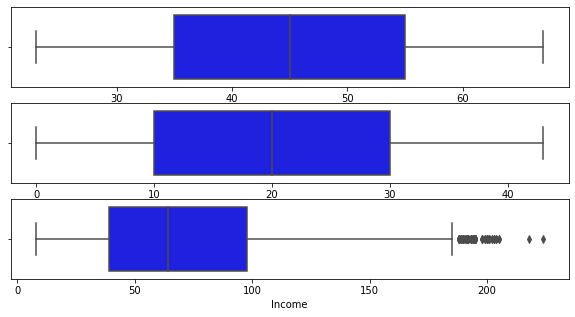

In [36]:
# EDA - Checking the presence of outliers in Age, Experience, Income
"""
Inference: Income has extreme values
"""
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
sns.boxplot(x= df.Age, color='blue')

plt.subplot(3,1,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= df.Income, color='blue')

plt.show()

AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)


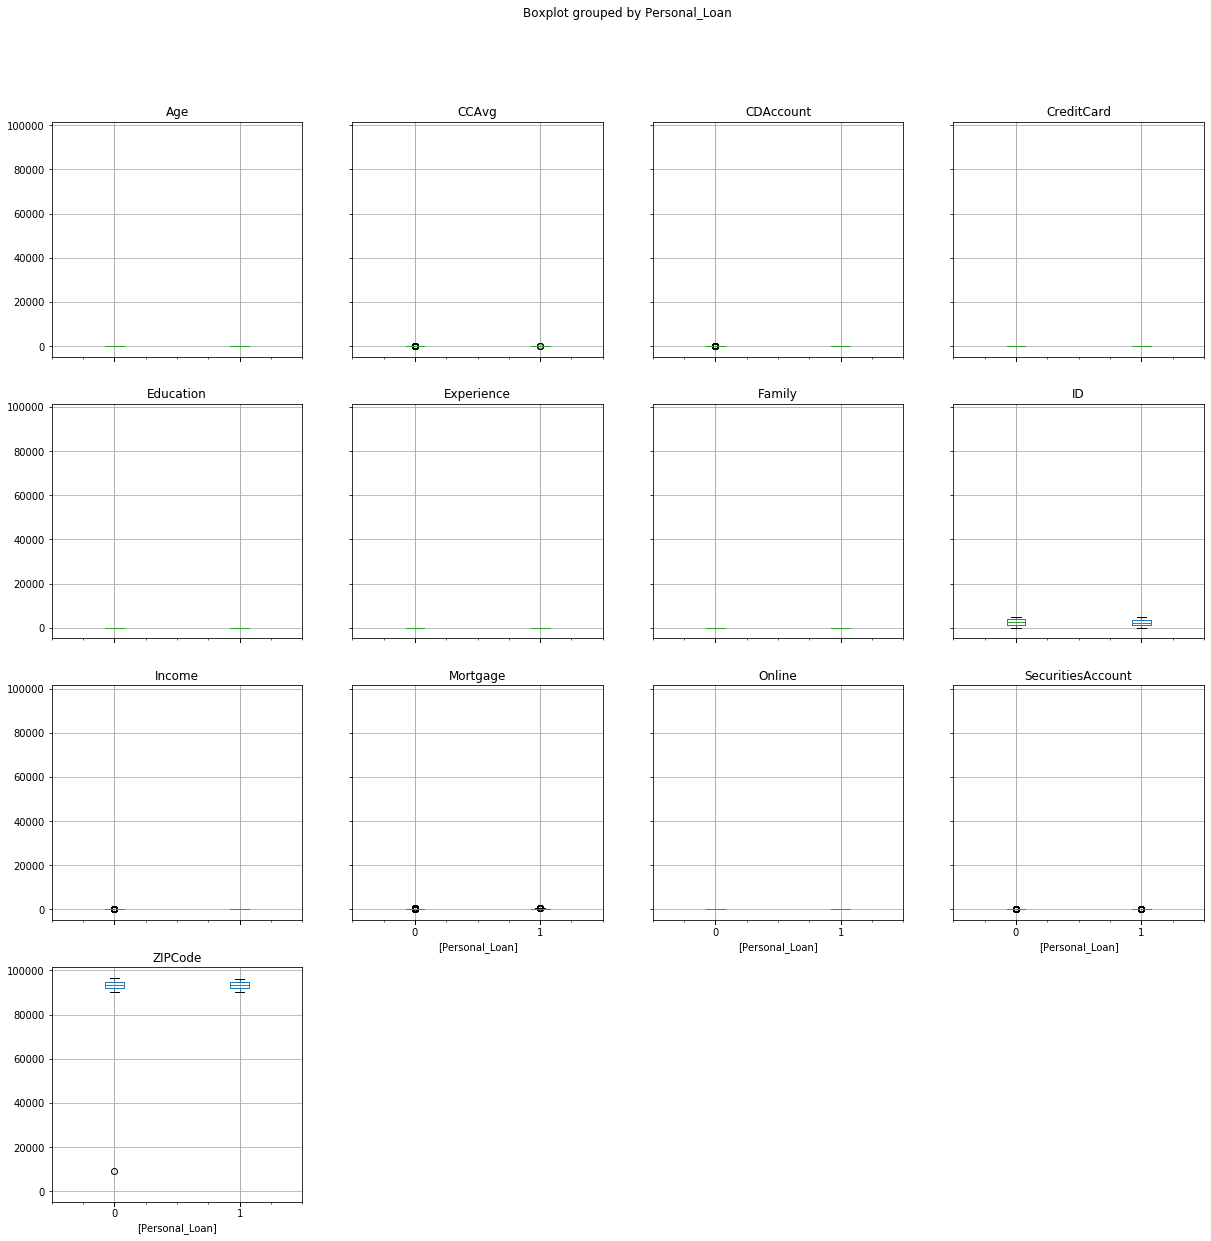

In [38]:
import matplotlib.pylab as plt

df.boxplot(by = 'Personal_Loan',  layout=(4,4), figsize=(20, 20))
print(df.boxplot('Age'))
print(df.boxplot('Income'))
print(df.boxplot('Education'))

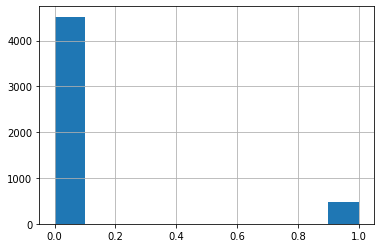

In [39]:
# Distribution of Target column - Personal Loan
# Inference : Most of them (> 4000) have not taken Personal Loan
df['Personal_Loan'].hist(bins=10)

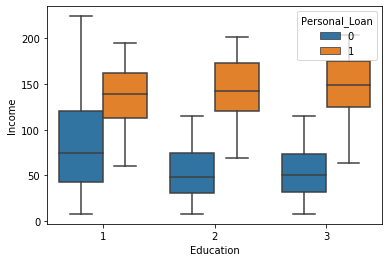

In [40]:
#Inference from below Box Plot (Income Vs Education) and impact on Personal loan

"""
1. The customers whose education level is 1 (Under Grad) is having more income than the others.
2. The customers who has taken the Personal Loan have the same Income levels.
3. The Customers with education levels 2 (Grad) and 3 (Advanced / Professional) have same income level with no Personal Loan.
"""
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=df)

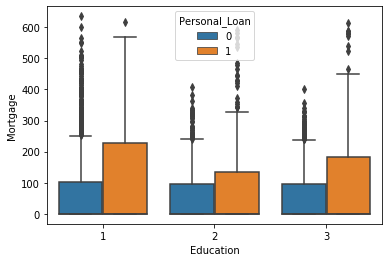

In [41]:
#Inference from below Box Plot (Mortgage Vs Education) and impact on Personal loan
"""
1. There are so many outliers in each of categories of education
2. But the customers with and without Personal Loan have high Mortage
"""
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=df)

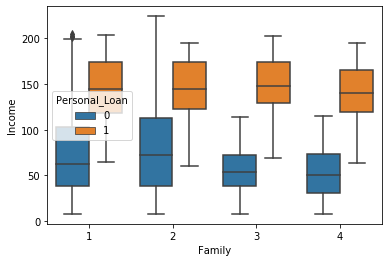

In [43]:
#Inference from below Box Plot (Family Vs Income) and impact on Personal loan
"""
Families with income less than 100K are less likely to take loan than families with higher income
"""
sns.boxplot(x="Family",y="Income",hue="Personal_Loan",data=df)

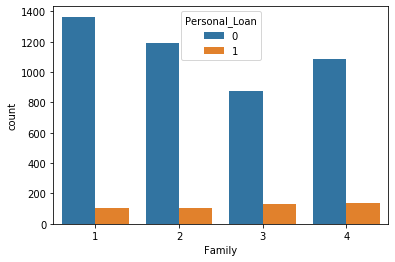

In [46]:
#Inference from below Count Plot for Family attribute and impact on Personal loan
"""
1. There is no that much impact on Personal Loan if we consider Family attribute.
2. But the Family with size 3 is taking more Personal loan as compare to other family size
"""
sns.countplot(x='Family',data=df,hue='Personal_Loan')

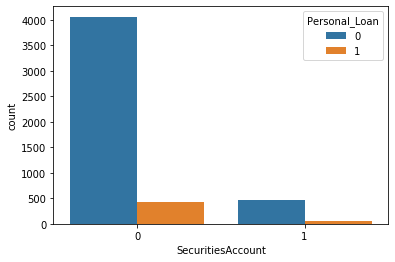

In [48]:
#Inference from below Count Plot for SecuritiesAccount attribute and impact on Personal loan
"""
The Majority of the customers who do not have Personal loan have Securities Account
"""
sns.countplot(x="SecuritiesAccount", data=df,hue="Personal_Loan")

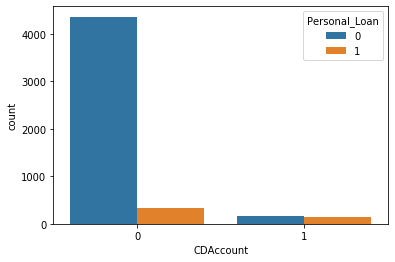

In [50]:
#Inference from below Count Plot for CDAccount attribute and impact on Personal loan
"""
The customers with CDAccount almost have Personal Loan
"""
sns.countplot(x='CDAccount',data=df,hue='Personal_Loan')

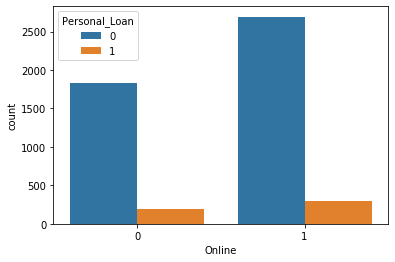

In [54]:
#Inference from below Count Plot for Online attribute and impact on Personal loan
"""
The count of customers taken Personal loan is less whether they are using internet facilities or not using internet facilities
"""
sns.countplot(x='Online',data=df,hue='Personal_Loan')

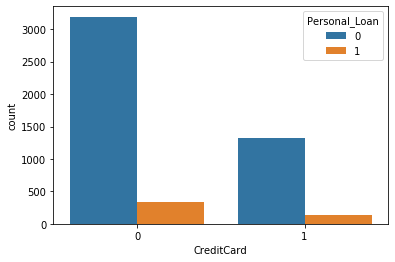

In [55]:
#Inference from below Count Plot for CreditCard attribute and impact on Personal loan
"""
The count of customers taken Personal loan is less whether they are using CreditCard or not using CreditCard
"""
sns.countplot(x='CreditCard',data=df,hue='Personal_Loan')

Text(0.5, 1.0, 'Distribution of Education by Age and Experience')

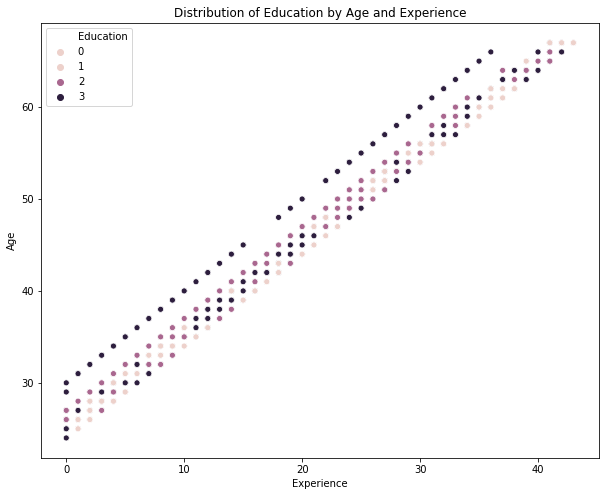

In [56]:
# Distribution of Education by Age and Experience
"""
Inference: 
1.Experience and Age gives a positive correlation ,as Experience increases Age also increases.
2.We can see that more people are in the under graduate level.
"""
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =df, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")

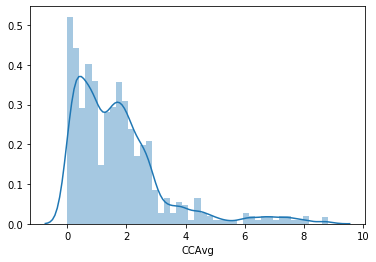

In [59]:
#Dist Plot for CCAvg attribute and impact on not having Personal Loan
sns.distplot( df[df.Personal_Loan == 0]['CCAvg'])

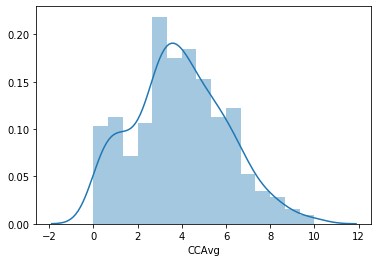

In [61]:
#Dist Plot for CCAvg attribute and impact on having Personal Loan
"""
Inference: the customers with higher CCAvg have Personal Loan
"""
sns.distplot( df[df.Personal_Loan == 1]['CCAvg'])

In [62]:
#Calculating the correlation matrix
cor=df.corr()
cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


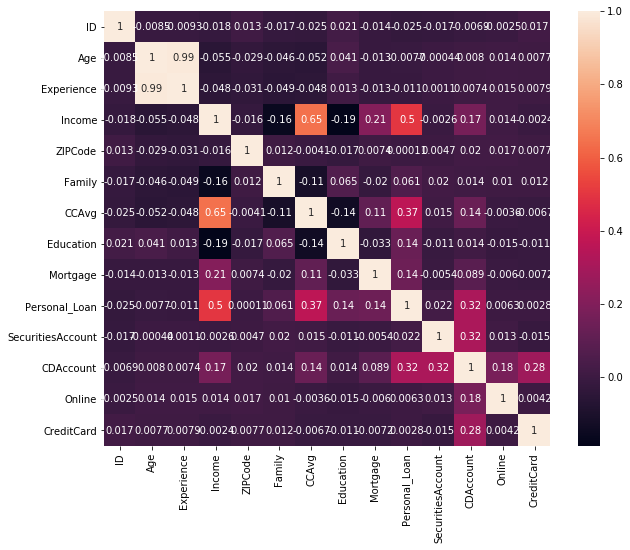

In [63]:
# Heat Map
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

In [66]:
# Summary - Conclusion from EDA :
"""
1."Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
7.Distributin of "Family" and "Education" are evenly distributed
8.Income and CCAvg is moderately correlated.
9.Experience and Age gives a positive correlation.
10.Families with income less than 100K are less likely to take loan,than families with high income.
11.The customers whose education level is 1 is having more income than the others.
12.The customers with and without Personal Loan have high Mortage.
13.Families with income less than 100K are less likely to take loan,than families with high income.
14.Ther is no that much impact on Personal Loan if we consider Family attribute. But the Family with size 3 is taking more Personal loan as compare to other family size.
15.The Majority is the customers who do not have Personal loan have Securities Account.
16.The customers with CDAccount almost have Personal Loan
17.The count of customers taken Personal loan is less whether they are using internet facilities or not using internet facilities
18.The count of customers taken Personal loan is less whether they are using CreditCard or not using CreditCard
19.Experience and Age gives a positive correlation ,as Experience increases Age also increases.We can see that more people are in the under graduate level.
20.The customers with higher CCAvg have Personal Loan
"""

'\n1."Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.\n2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.\n3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.\n4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.\n5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.\n6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.\n7.Distributin of "Family" and "Education" are evenly distributed\n8.Income and CCAvg is moderately correlated.\n9.Experience and Age gives a positive correlation.\n10.Families with income less tha

In [67]:
# Applying classification models - Logistic Regression

data=df.drop(['ID','ZIPCode','Experience'], axis =1 )
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Income             5000 non-null   int64  
 2   Family             5000 non-null   int64  
 3   CCAvg              5000 non-null   float64
 4   Education          5000 non-null   int64  
 5   Mortgage           5000 non-null   int64  
 6   Personal_Loan      5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [70]:
data1=data[['Age','Income','Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard','Personal_Loan']]
data1.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
5,37,29,4,0.4,2,155,0,0,1,0,0
6,53,72,2,1.5,2,0,0,0,1,0,0
7,50,22,1,0.3,3,0,0,0,0,1,0
8,35,81,3,0.6,2,104,0,0,1,0,0
9,34,180,1,8.9,3,0,0,0,0,0,1


In [71]:
data1.shape

(5000, 11)

In [72]:
data1["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [126]:
array = data1.values
X = array[:,0:9] # select all rows and first 10 columns which are the attributes
Y = array[:,10]   # select all rows and the 10th column which is the classification "0", "1"
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1) # To set the random state
type(X_train)

numpy.ndarray

In [133]:
# Fit the model on 30%
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  # Accuracy of Logistic regression model

Accuracy: 0.9406666666666667
confusion_matrix:
[[1336   15]
 [  74   75]]


In [80]:
# Applying Naive-Bayes

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [81]:
X = data1.values[:,0:9]  ## Features
Y = data1.values[:,10]  ## Target.values[:,10]  ## Target

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 2)

In [84]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
Y_pred = clf.predict(X_test)

In [122]:
B=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',B)

Accuracy_score: 0.89


In [118]:
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_pred))

0.5144927536231884


In [88]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[1264   98]
 [  67   71]]


In [89]:
# Applying K-NN

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [90]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data1))
X_std.columns = data1.columns

In [91]:
#spliting the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [92]:
# Transform data into features and target
X = np.array(data1.iloc[:,1:11]) 
y = np.array(data1['Personal_Loan'])

In [93]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [94]:
print(X_train.shape)
print(y_train.shape)

(3500, 10)
(3500,)


In [95]:
print(X_test.shape)
print(y_test.shape)

(1500, 10)
(1500,)


In [96]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [109]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9426666666666667


In [110]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.938


In [111]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9413333333333334


In [112]:
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9406666666666667


In [113]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


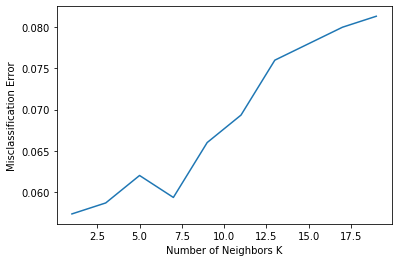

In [114]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [115]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
C=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',C)    
print(recall_score(y_test, y_pred))

Accuracy_score: 0.9426666666666667
0.6423841059602649


In [116]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[1317   32]
 [  54   97]]


In [134]:
# Comparison of Logistic, Naive-Bayes & KNN models
print(A)#Accuracy of Logistic regression model

0.9406666666666667


In [135]:
print(B)#Accuracy of Naive-Bayes model

0.89


In [121]:
print(C)#Accuracy of K-NN model

0.9426666666666667


In [ ]:
#Conclusion:
"""
Thera bank wants a new marketing campaign of converting its liability customers to personal loan customers. For the 
new marketing campaign,the bank management needs information about the correlation between the variables given in the 
dataset.

The classification goal is to predict the likelihood of a liability customer buying personal loans.
 
I have used 3 classification models to study.From the accuracy scores , it seems like "KNN" algorithm has the 
highest accuracy and stability.
"""